In [134]:
# Import Packages

In [135]:
import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [103]:
# Import Dataset

In [104]:
data1 = pd.read_csv('/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/Decision Trees/Text.csv')

In [105]:
data1

,LABEL,able,absorbed,absurdity,abundance,abundant,abundantly,accelerated,accident,accidentally,...,yard,year,years,yellow,yield,yolk,york,young,youngest,zone
0,Rivers of Death,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rivers of Death,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rivers of Death,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Realms of the Soil,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Realms of the Soil,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
5,Realms of the Soil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Rivers of Death,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,2,2,0
7,Rivers of Death,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
8,Rivers of Death,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
9,Earth's Green Mantle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Craete Training and Testing data

In [107]:
TrainDF, TestDF = train_test_split(data1, test_size=0.3)

In [108]:
# Sperate labels

In [109]:
# Testing data
TestLabels = TestDF['LABEL']
print(TestLabels)

17        Indiscriminately from the Skies
39                        Rivers of Death
28        Indiscriminately from the Skies
16    Surface Waters and Underground Seas
45                   Earth's Green Mantle
6                         Rivers of Death
4                      Realms of the Soil
31    Surface Waters and Underground Seas
27    Surface Waters and Underground Seas
5                      Realms of the Soil
40                   Earth's Green Mantle
44                     Realms of the Soil
34                     Realms of the Soil
48                     Realms of the Soil
9                    Earth's Green Mantle
Name: LABEL, dtype: object


In [110]:
TestDF = TestDF.drop(['LABEL'], axis=1)
TestDF

,able,absorbed,absurdity,abundance,abundant,abundantly,accelerated,accident,accidentally,according,...,yard,year,years,yellow,yield,yolk,york,young,youngest,zone
17,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,2,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Train data
TrainLabels = TrainDF['LABEL']
print(TrainLabels)

29        Indiscriminately from the Skies
41                        Rivers of Death
3                      Realms of the Soil
13    Surface Waters and Underground Seas
36                   Earth's Green Mantle
8                         Rivers of Death
32        Indiscriminately from the Skies
12                        Rivers of Death
43                     Realms of the Soil
23        Indiscriminately from the Skies
26    Surface Waters and Underground Seas
35                     Realms of the Soil
20        Indiscriminately from the Skies
10                   Earth's Green Mantle
14    Surface Waters and Underground Seas
19    Surface Waters and Underground Seas
21    Surface Waters and Underground Seas
49                   Earth's Green Mantle
30    Surface Waters and Underground Seas
11                   Earth's Green Mantle
38                     Realms of the Soil
2                         Rivers of Death
1                         Rivers of Death
46                        Rivers o

In [112]:
TrainDF = TrainDF.drop('LABEL', axis=1)

In [113]:
TrainDF

,able,absorbed,absurdity,abundance,abundant,abundantly,accelerated,accident,accidentally,according,...,yard,year,years,yellow,yield,yolk,york,young,youngest,zone
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,0,0,0,0,1,0,1,0,0,0,...,0,3,1,0,0,0,0,3,0,0
43,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Run Decision Tree

In [115]:
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='random',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)

In [116]:
MyDT.fit(TrainDF, TrainLabels)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [117]:
# Visualize Decision Tree

In [118]:
from sklearn.tree import export_graphviz
export_graphviz(MyDT, out_file="model.dot", class_names=list(data1['LABEL']), feature_names=list(data1.columns)[1:], impurity=True, filled=True) 
import graphviz
with open("model.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

In [119]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.pdf'

In [120]:
# COnfusuion Matrix

In [121]:
print("Prediction\n")
DT_pred = MyDT.predict(TestDF)
print(DT_pred)

Prediction

['Rivers of Death' 'Rivers of Death' 'Realms of the Soil'
 'Rivers of Death' 'Surface Waters and Underground Seas' 'Rivers of Death'
 'Rivers of Death' 'Rivers of Death' 'Rivers of Death'
 'Surface Waters and Underground Seas' 'Rivers of Death'
 "Earth's Green Mantle" "Earth's Green Mantle" "Earth's Green Mantle"
 "Earth's Green Mantle"]


The confusion matrix is:
[[1 0 0 1 1]
 [0 0 1 1 0]
 [3 0 0 1 1]
 [0 0 0 2 0]
 [0 0 0 3 0]]


<AxesSubplot:>

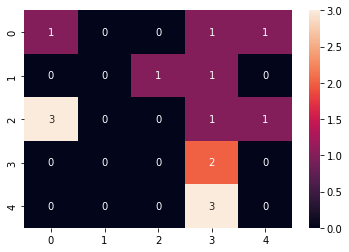

In [122]:
bn_matrix = confusion_matrix(TestLabels, DT_pred)
print("The confusion matrix is:")
print(bn_matrix)
sns.heatmap(bn_matrix, annot=True)

In [123]:
print("Accuracy on training set{:.3f}".format(MyDT.score(TrainDF, TrainLabels)))
print("Accuracy on testing set{:.3f}".format(MyDT.score(TestDF, TestLabels)))

Accuracy on training set1.000
Accuracy on testing set0.200


In [ ]:
# Key Feature

In [140]:
feature_names=list(data1.columns)[1:]
FeatureImp1=MyDT.feature_importances_   
indices1 = np.argsort(FeatureImp1)[::-1]
for f in range(TrainDF.shape[1]):
    if FeatureImp1[indices1[f]]>0:
        print("%d. feature %d (%f)" % (f + 1, indices1[f], FeatureImp1[indices1[f]]))
        print ("feature name: ", feature_names[indices1[f]])

1. feature 1285 (0.183114)
feature name:  organic
2. feature 1773 (0.181312)
feature name:  streams
3. feature 847 (0.140412)
feature name:  gypsy
4. feature 279 (0.098521)
feature name:  chemicals
5. feature 1376 (0.085553)
feature name:  pollutants
6. feature 79 (0.085320)
feature name:  animals
7. feature 1738 (0.058179)
feature name:  sprayed
8. feature 135 (0.051378)
feature name:  autumn
9. feature 1451 (0.051145)
feature name:  public
10. feature 871 (0.040256)
feature name:  health
11. feature 1730 (0.024810)
feature name:  split


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Feature: 1764, Score: 0.00000
Feature: 1765, Score: 0.00000
Feature: 1766, Score: 0.00000
Feature: 1767, Score: 0.00000
Feature: 1768, Score: 0.00000
Feature: 1769, Score: 0.00000
Feature: 1770, Score: 0.00000
Feature: 1771, Score: 0.00000
Feature: 1772, Score: 0.00000
Feature: 1773, Score: 0.18131
Feature: 1774, Score: 0.00000
Feature: 1775, Score: 0.00000
Feature: 1776, Score: 0.00000
Feature: 1777, Score: 0.00000
Feature: 1778, Score: 0.00000
Feature: 1779, Score: 0.00000
Feature: 1780, Score: 0.00000
Feature: 1781, Score: 0.00000
Feature: 1782, Score: 0.00000
Feature: 1783, Score: 0.00000
Feature: 1784, Score: 0.00000
Feature: 1785, Score: 0.00000
Feature: 1786, Score: 0.00000
Feature: 1787, Score: 0.00000
Feature: 1788, Score: 0.00000
Feature: 1789, Score: 0.00000
Feature: 1790, Score: 0.00000
Feature: 1791, Score: 0.00000
Feature: 1792, Score: 0.00000
Feature: 1793, Score: 0.00000
Feature: 1794, Score: 0.00000
Feature: 1795, Score: 0.00000
Feature: 1796, Score: 0.00000
Feature: 1

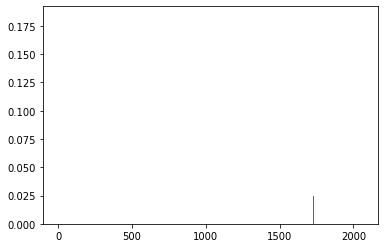

In [143]:
from matplotlib import pyplot
# get importance
importance = MyDT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [124]:
# Second Decision Tree

In [125]:
MyDT2=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
MyDT2.fit(TrainDF, TrainLabels)
from sklearn.tree import export_graphviz
export_graphviz(MyDT2, out_file="model2.dot", class_names=list(data1['LABEL']), feature_names=list(data1.columns)[1:], impurity=True, filled=True) 
import graphviz
with open("model2.dot") as f:
    dot_graph = f.read()
graph2 = graphviz.Source(dot_graph)
graph2.render("decision_tree_graphivz2")

'decision_tree_graphivz2.pdf'

In [126]:
print("Prediction\n")
DT_pred2 = MyDT2.predict(TestDF)
print(DT_pred2)

Prediction

["Earth's Green Mantle" 'Rivers of Death' "Earth's Green Mantle"
 'Rivers of Death' "Earth's Green Mantle" 'Rivers of Death'
 "Earth's Green Mantle" 'Rivers of Death' 'Rivers of Death'
 'Realms of the Soil' "Earth's Green Mantle" 'Realms of the Soil'
 'Realms of the Soil' 'Realms of the Soil' "Earth's Green Mantle"]


The confusion matrix is:
[[3 0 0 0 0]
 [2 0 0 0 0]
 [1 0 4 0 0]
 [0 0 0 2 0]
 [0 0 0 3 0]]


<AxesSubplot:>

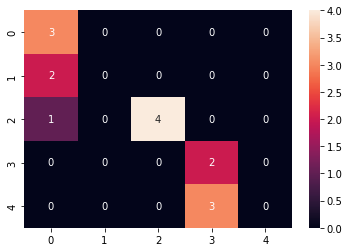

In [127]:
bn_matrix2 = confusion_matrix(TestLabels, DT_pred2)
print("The confusion matrix is:")
print(bn_matrix2)
sns.heatmap(bn_matrix2, annot=True)

In [128]:
print("Accuracy on training set{:.3f}".format(MyDT2.score(TrainDF, TrainLabels)))
print("Accuracy on testing set{:.3f}".format(MyDT2.score(TestDF, TestLabels)))

Accuracy on training set1.000
Accuracy on testing set0.600


In [ ]:
# Feature Importance

In [144]:
feature_names=list(data1.columns)[1:]
FeatureImp2=MyDT2.feature_importances_   
indices2 = np.argsort(FeatureImp2)[::-1]
for f in range(TrainDF.shape[1]):
    if FeatureImp2[indices2[f]]>0:
        print("%d. feature %d (%f)" % (f + 1, indices2[f], FeatureImp2[indices2[f]]))
        print ("feature name: ", feature_names[indices2[f]])

1. feature 1703 (0.192676)
feature name:  soil
2. feature 1773 (0.178759)
feature name:  streams
3. feature 1194 (0.130476)
feature name:  moth
4. feature 2000 (0.093291)
feature name:  water
5. feature 1167 (0.090464)
feature name:  miles
6. feature 4 (0.083847)
feature name:  abundant
7. feature 1451 (0.082758)
feature name:  public
8. feature 388 (0.063883)
feature name:  control
9. feature 783 (0.047912)
feature name:  fullest
10. feature 1800 (0.035934)
feature name:  summer


In [129]:
# Third Decision Tree

In [130]:
MyDT3=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
MyDT3.fit(TrainDF, TrainLabels)
from sklearn.tree import export_graphviz
export_graphviz(MyDT3, out_file="model3.dot", class_names=list(data1['LABEL']), feature_names=list(data1.columns)[1:], impurity=True, filled=True) 
import graphviz
with open("model3.dot") as f:
    dot_graph = f.read()
graph3 = graphviz.Source(dot_graph)
graph3.render("decision_tree_graphivz3")

'decision_tree_graphivz3.pdf'

In [131]:
print("Prediction\n")
DT_pred3 = MyDT3.predict(TestDF)
print(DT_pred3)

Prediction

["Earth's Green Mantle" 'Rivers of Death' "Earth's Green Mantle"
 'Rivers of Death' "Earth's Green Mantle" 'Rivers of Death'
 "Earth's Green Mantle" 'Rivers of Death' 'Rivers of Death'
 'Realms of the Soil' "Earth's Green Mantle" 'Realms of the Soil'
 'Realms of the Soil' 'Realms of the Soil' "Earth's Green Mantle"]


The confusion matrix is:
[[3 0 0 0 0]
 [2 0 0 0 0]
 [1 0 4 0 0]
 [0 0 0 2 0]
 [0 0 0 3 0]]


<AxesSubplot:>

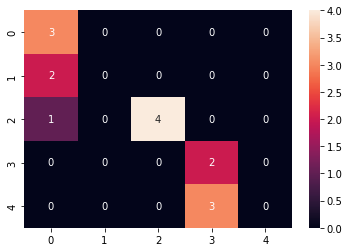

In [132]:
bn_matrix3 = confusion_matrix(TestLabels, DT_pred3)
print("The confusion matrix is:")
print(bn_matrix3)
sns.heatmap(bn_matrix3, annot=True)

In [133]:
print("Accuracy on training set{:.3f}".format(MyDT3.score(TrainDF, TrainLabels)))
print("Accuracy on testing set{:.3f}".format(MyDT3.score(TestDF, TestLabels)))

Accuracy on training set0.943
Accuracy on testing set0.600


In [145]:
feature_names=list(data1.columns)[1:]
FeatureImp3=MyDT3.feature_importances_   
indices3 = np.argsort(FeatureImp3)[::-1]
for f in range(TrainDF.shape[1]):
    if FeatureImp3[indices3[f]]>0:
        print("%d. feature %d (%f)" % (f + 1, indices3[f], FeatureImp3[indices3[f]]))
        print ("feature name: ", feature_names[indices3[f]])

1. feature 1703 (0.210310)
feature name:  soil
2. feature 1773 (0.195119)
feature name:  streams
3. feature 847 (0.142417)
feature name:  gypsy
4. feature 2000 (0.101829)
feature name:  water
5. feature 1167 (0.098743)
feature name:  miles
6. feature 4 (0.091520)
feature name:  abundant
7. feature 1451 (0.090332)
feature name:  public
8. feature 388 (0.069730)
feature name:  control
